# SVM classification with Python

We'll try to use SVM to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

Let's grab it and use it!

# Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the Data

In [2]:
social = pd.read_csv("Social_Network_Ads.csv")

In [3]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


# Exploratory Data Analysis

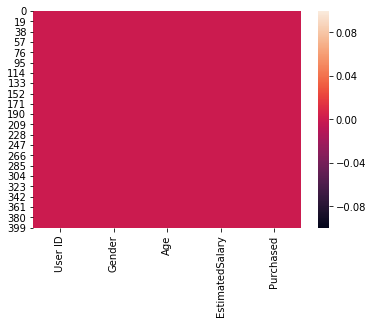

In [5]:
sns.heatmap(social.isnull())

In [6]:
social.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
social.drop('User ID', axis=1, inplace=True)

In [8]:
social.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [9]:
social["Sex_male"] = social.Gender.map({'Female':0 , 'Male':1})

In [10]:
social.head(2)

,Gender,Age,EstimatedSalary,Purchased,Sex_male
0,Male,19,19000,0,1
1,Male,35,20000,0,1


In [11]:
social.drop('Gender', axis=1, inplace=True)

In [12]:
social.head(2)

,Age,EstimatedSalary,Purchased,Sex_male
0,19,19000,0,1
1,35,20000,0,1


# Check Correlation

In [13]:
social.corr()

,Age,EstimatedSalary,Purchased,Sex_male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Sex_male,-0.073741,-0.060435,-0.042469,1.000000


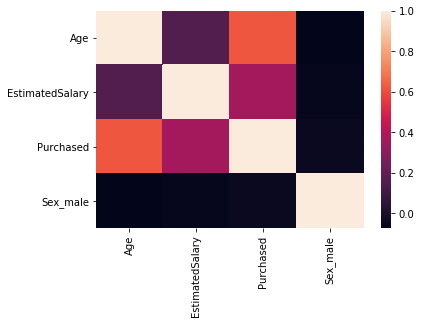

In [14]:
sns.heatmap(social.corr())

since there is no relation of gender with purchasing, we will drop sex_male column

In [15]:
social.drop('Sex_male', axis=1, inplace=True)

In [16]:
social.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


## Standardize the Variables

Because the Decision tree classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the decision tree classifier, than variables that are on a small scale.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [21]:
scaler.fit(social.drop('Purchased', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_features = scaler.transform(social.drop('Purchased', axis=1))

In [23]:
X = pd.DataFrame(scaled_features, columns=['Age', 'EstimatedSalary'])

In [24]:
X.head(2)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681


In [25]:
type(X)

pandas.core.frame.DataFrame

In [26]:
Y = social['Purchased']

In [27]:
type(Y)

pandas.core.series.Series

In [28]:
Y.shape

(400,)

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Using SVM

In [32]:
from sklearn.svm import SVC

In [33]:
model = SVC()

In [34]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predictions

In [35]:
prediction = model.predict(x_test)

# Evaluations

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y_test, prediction))

[[68  8]
 [ 5 39]]


Our model can successfully predict whether a user will purchase or not